In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

In [2]:
os.getcwd()


'C:\\Users\\Dell'

In [3]:
os.chdir('C:\\Users\\Dell\\OneDrive\\Desktop\\Data Science\\sir drive\\Jun 23 DS Day 16\\Projects\\PRJ Sales Forecasting')
os.getcwd()

'C:\\Users\\Dell\\OneDrive\\Desktop\\Data Science\\sir drive\\Jun 23 DS Day 16\\Projects\\PRJ Sales Forecasting'

In [4]:
dt = pd.read_csv('Train.csv')
display(dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
print(dt.shape)

(8523, 12)


In [6]:
print(dt.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [7]:
print(dt.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [8]:
display(dt.info)

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [9]:
display(dt.apply(lambda x:len(x.unique())))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
display(dt.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
cat_col=[]
for i in dt.dtypes.index:
    if dt.dtypes[i]=='object':
        cat_col.append(i)
display(cat_col)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
cat_col.remove("Item_Identifier")
cat_col.remove("Outlet_Identifier")
display(cat_col)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
for col in cat_col:
    print(col,len(dt[col].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [14]:
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()
    print('*'*50)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

**************************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

**************************************************
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**************************************************
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: 

In [15]:
miss_bool = dt['Item_Weight'].isnull()
display(miss_bool)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [16]:
display(dt['Item_Weight'].isnull().sum())

1463

In [17]:
Item_Weight_null = dt[dt['Item_Weight'].isna()]
display(Item_Weight_null)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [18]:
Item_Weight_null['Item_Identifier'].value_counts()

FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: Item_Identifier, Length: 1142, dtype: int64

In [19]:
item_weight_mean = dt.pivot_table(values='Item_Weight',index='Item_Identifier')
display(item_weight_mean)

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [20]:
display(dt['Item_Identifier'])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [21]:
for i,item in enumerate(dt['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            dt['Item_Weight'][i]=item_weight_mean.iloc[item]['Item_Weight']
        else:
            dt['Item_Weight'][i]=np.mean(dt['Item_Weight'])

In [22]:
result = dt['Item_Weight'].isnull().sum()
display(result)

0

In [23]:
result=dt.groupby('Outlet_Size').agg({'Outlet_Size':np.size})
display(result)

,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [24]:
result= dt['Outlet_Size'].isnull().sum()
display (result)


2410

In [25]:
Outlet_Size_null= dt[dt['Outlet_Size'].isna()]
display (Outlet_Size_null)



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [26]:
result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)


Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [27]:
result= dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [28]:
outlet_size_mode = dt.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
display(outlet_size_mode)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [29]:
miss_bool =dt['Outlet_Size'].isnull()
dt.loc[miss_bool,'Outlet_Size']=dt.loc[miss_bool,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])

In [30]:
display(dt['Outlet_Size'].isnull().sum())

0

In [31]:
result = dt.groupby(['Outlet_Type','Outlet_Size']).agg({'Outlet_Type':[np.size]})
display(result)

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              930
                  Small              3715
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [32]:
display(sum(dt['Item_Visibility']==0))

526

In [33]:
dt.loc[:,'Item_Visibility'].replace([0],[dt['Item_Visibility'].mean()],inplace=True)

In [34]:
sum(dt['Item_Visibility']==0)

0

In [35]:
display(sum(dt['Item_Visibility']==0))

0

In [36]:
dt['Item_Fat_Content']=dt['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
result = dt['Item_Fat_Content'].value_counts()
display(result)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [37]:
dt['New_Item_Type']=dt['Item_Identifier'].apply(lambda x:x[:2])
display(dt['New_Item_Type'])

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [38]:
display(dt['New_Item_Type'].value_counts())

FD    6125
NC    1599
DR     799
Name: New_Item_Type, dtype: int64

In [39]:
dt['New_Item_Type']=dt['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
display(dt['New_Item_Type'].value_counts())

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [40]:
display(dt['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [41]:
result = dt.groupby(['New_Item_Type','Item_Fat_Content']).agg({'Outlet_Type':[np.size]})

In [42]:
display(result)

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [43]:
dt.loc[dt['New_Item_Type']=='Non-Consumable','Item_Fat_Content']='Non-Eatable'
result = dt['Item_Fat_Content'].value_counts()
display(result)

Low Fat        3918
Regular        3006
Non-Eatable    1599
Name: Item_Fat_Content, dtype: int64

In [44]:
result = dt.groupby(['New_Item_Type','Item_Fat_Content']).agg({'Outlet_Type':[np.size]})
display(result)

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Eatable             1599

In [45]:
dt['Outlet_Year']=2023-dt['Outlet_Establishment_Year']
display(dt['Outlet_Year'])

0       24
1       14
2       24
3       25
4       36
        ..
8518    36
8519    21
8520    19
8521    14
8522    26
Name: Outlet_Year, Length: 8523, dtype: int64

In [46]:
display(dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,24
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,25
4,NCD19,8.93,Non-Eatable,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,36


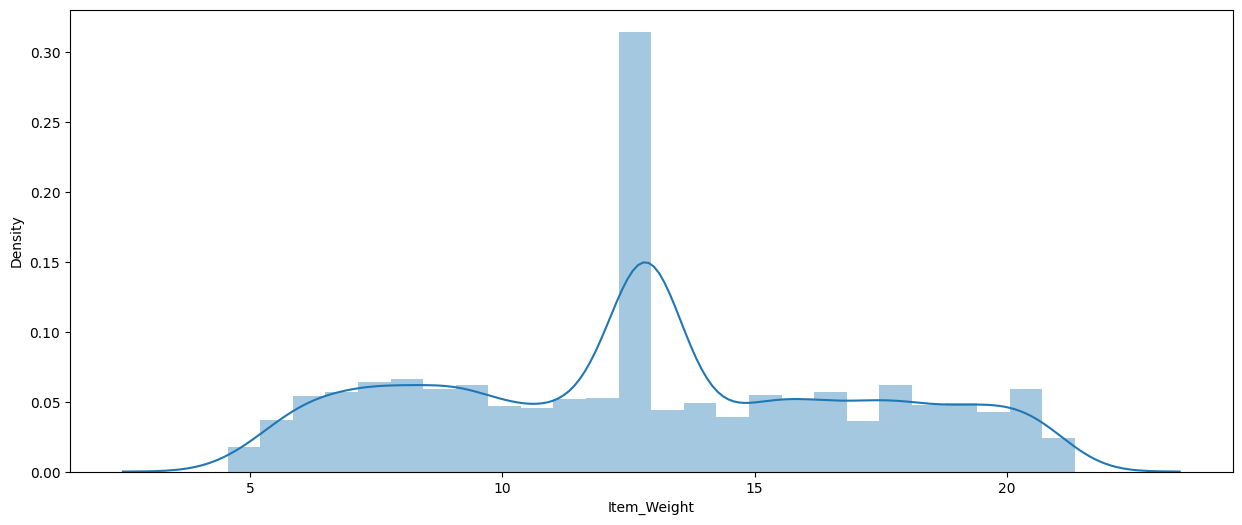

In [47]:
snb.distplot(dt['Item_Weight'])
plt.show()

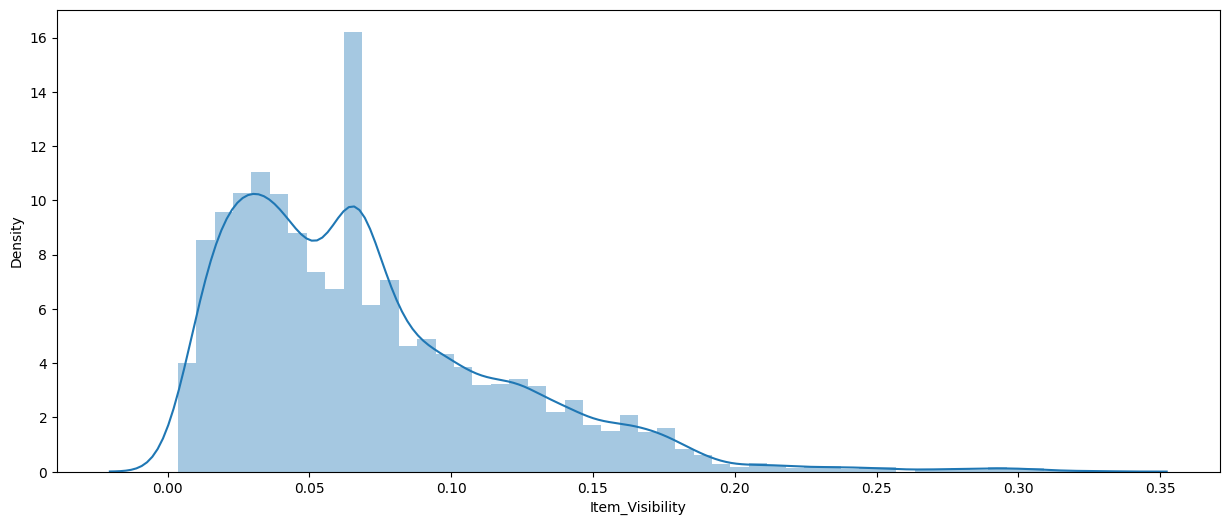

In [48]:
snb.distplot(dt['Item_Visibility'])
plt.show()

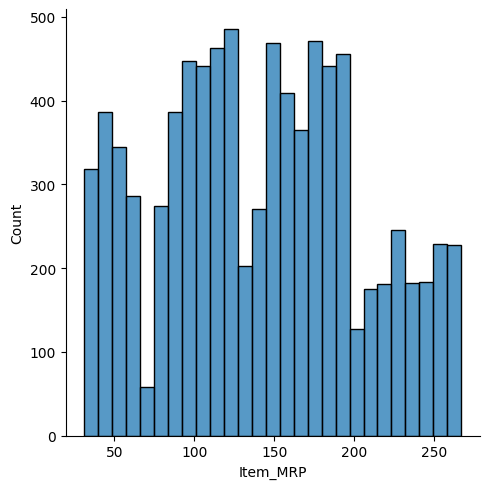

In [49]:
snb.displot(dt['Item_MRP'])
plt.show()

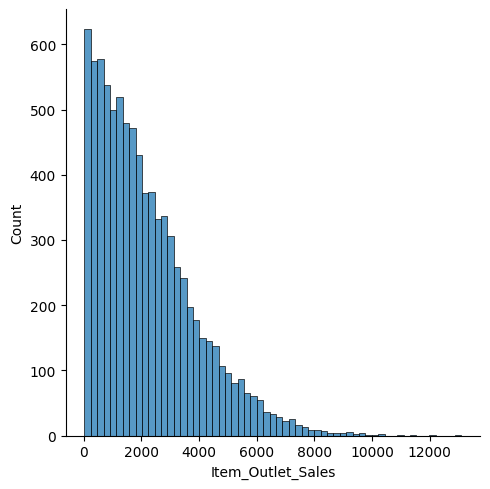

In [50]:
snb.displot(dt['Item_Outlet_Sales'])
plt.show()

In [51]:
dt['Item_Outlet_Sales']=np.log(1+dt['Item_Outlet_Sales'])
display(dt['Item_Outlet_Sales'])

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

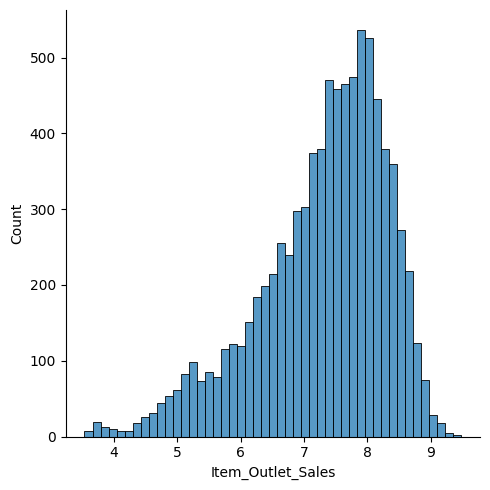

In [52]:
snb.displot(dt['Item_Outlet_Sales'])
plt.show()

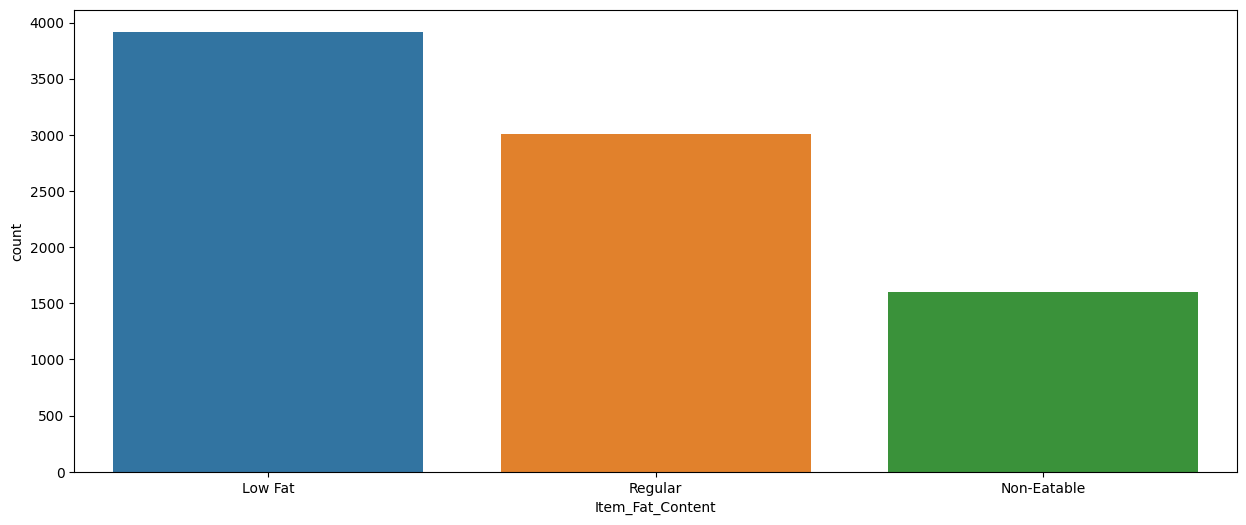

In [53]:
snb.countplot(x=dt['Item_Fat_Content'])
plt.show()

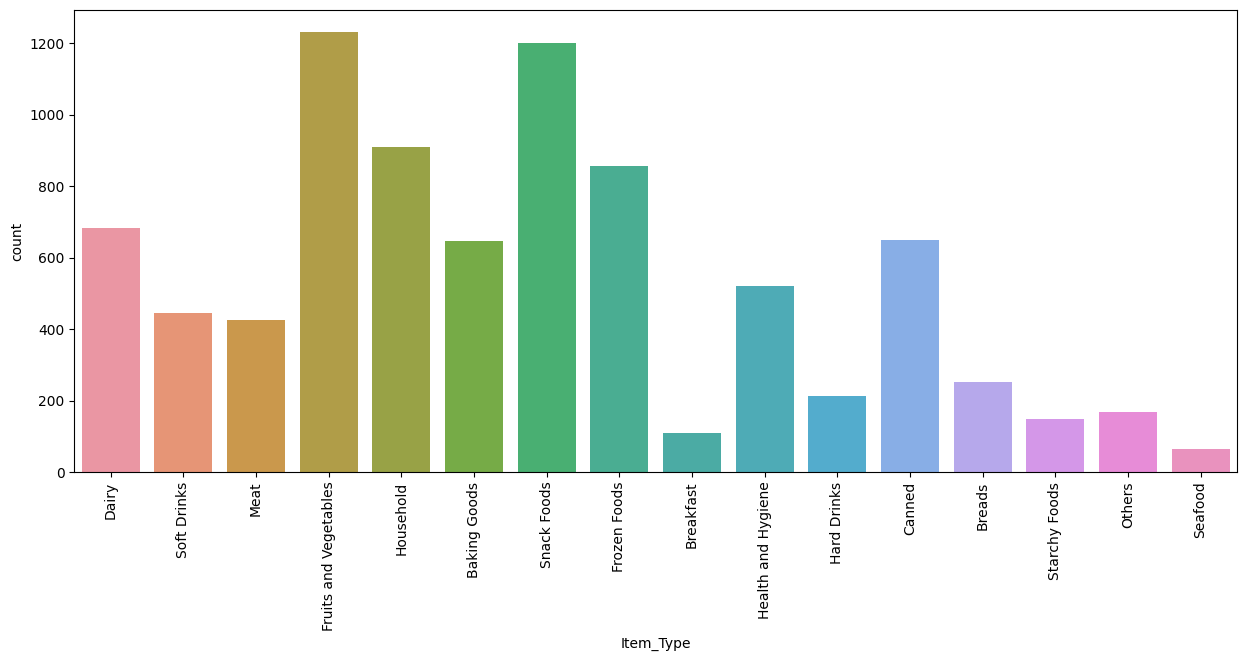

In [54]:
l = list(dt['Item_Type'].unique())
chart = snb.countplot(x=dt['Item_Type'])
chart.set_xticklabels(labels=l,rotation=90)
plt.show()

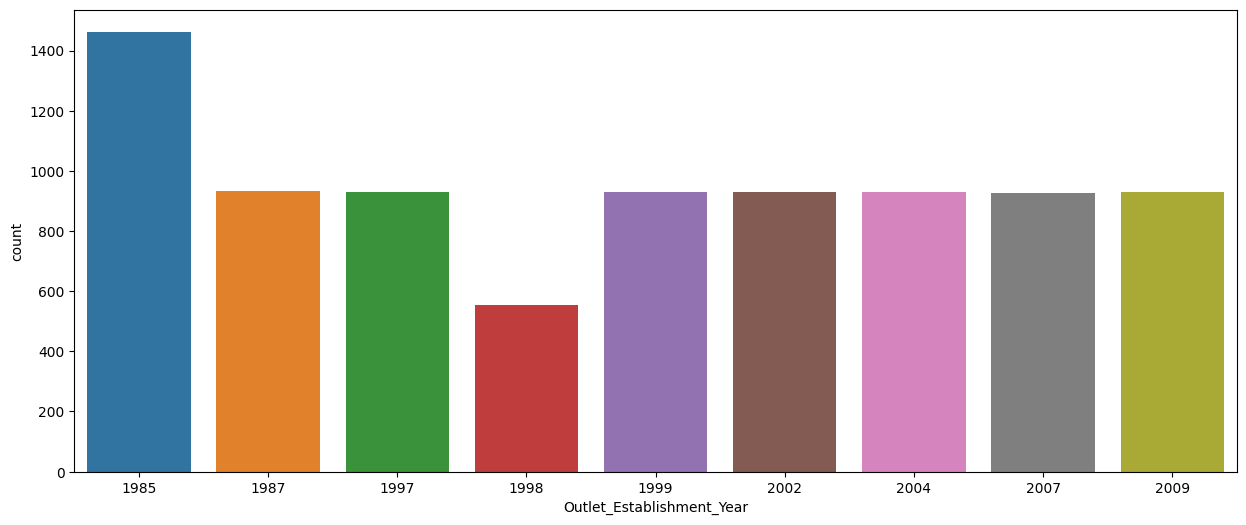

In [55]:
snb.countplot(x=dt['Outlet_Establishment_Year'])
plt.show()

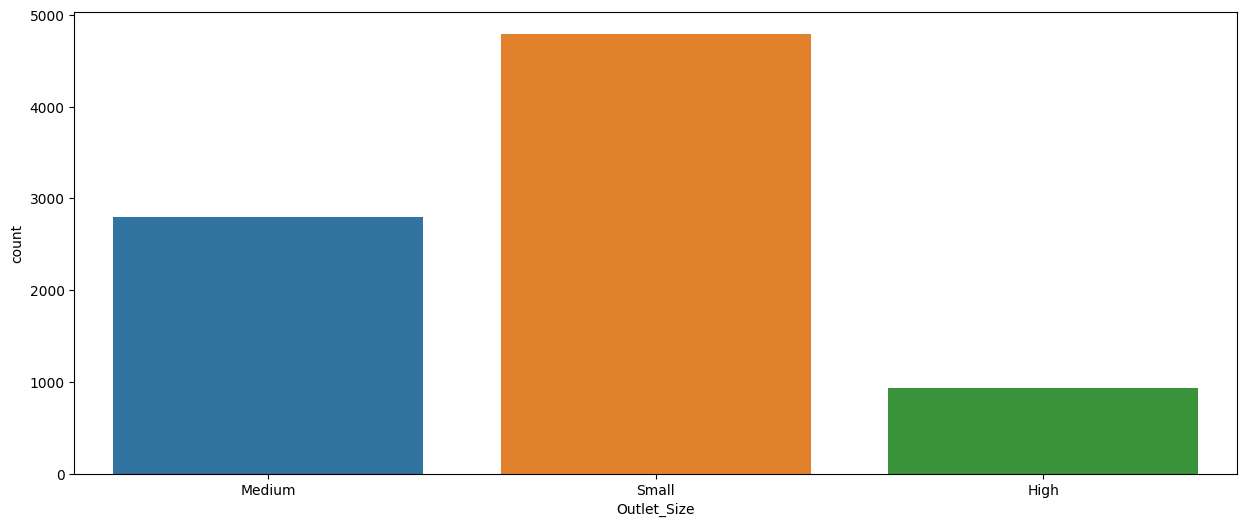

In [56]:
snb.countplot(x=dt['Outlet_Size'])
plt.show()

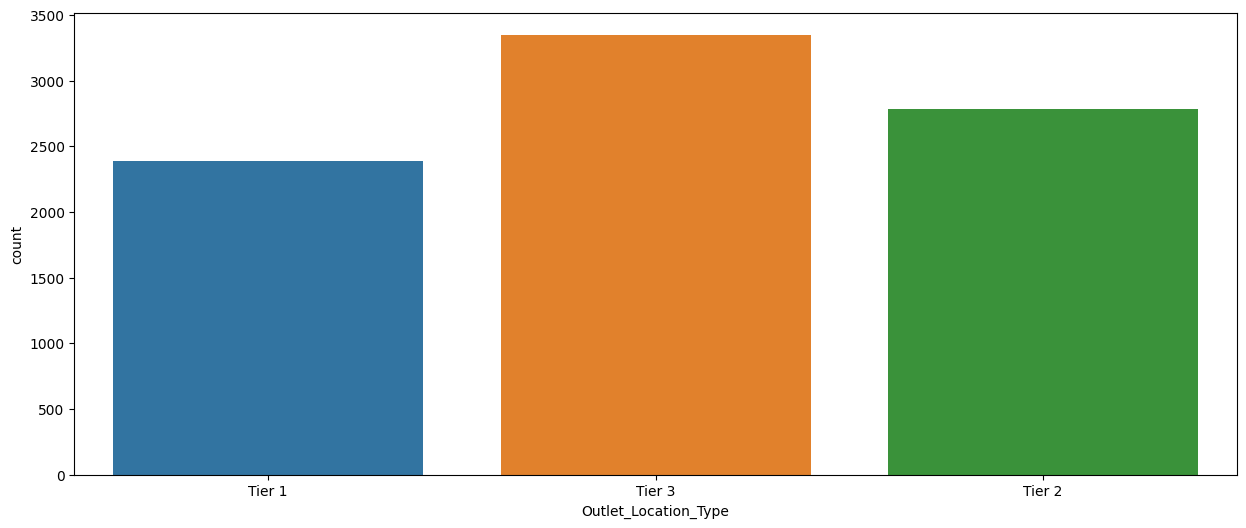

In [57]:
snb.countplot(x=dt['Outlet_Location_Type'])
plt.show()

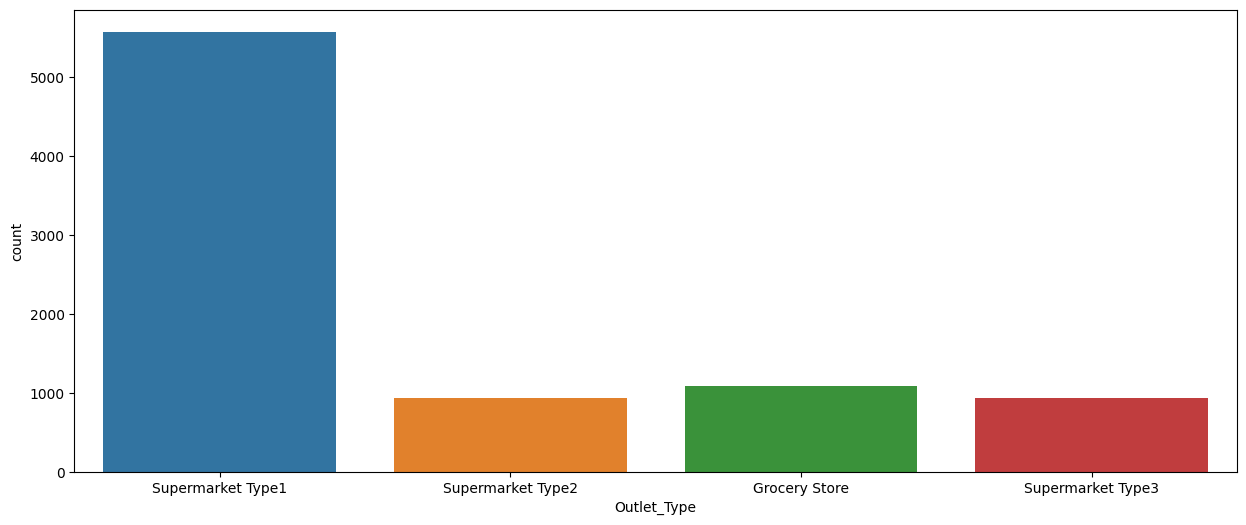

In [58]:
snb.countplot(x=dt['Outlet_Type'])
plt.show()

In [59]:
corr = dt.corr()
display(corr)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Year
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.008059,0.008301
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.008059,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_Year,0.008301,0.078355,-0.005020,-1.000000,-0.077032,1.000000


<AxesSubplot: >

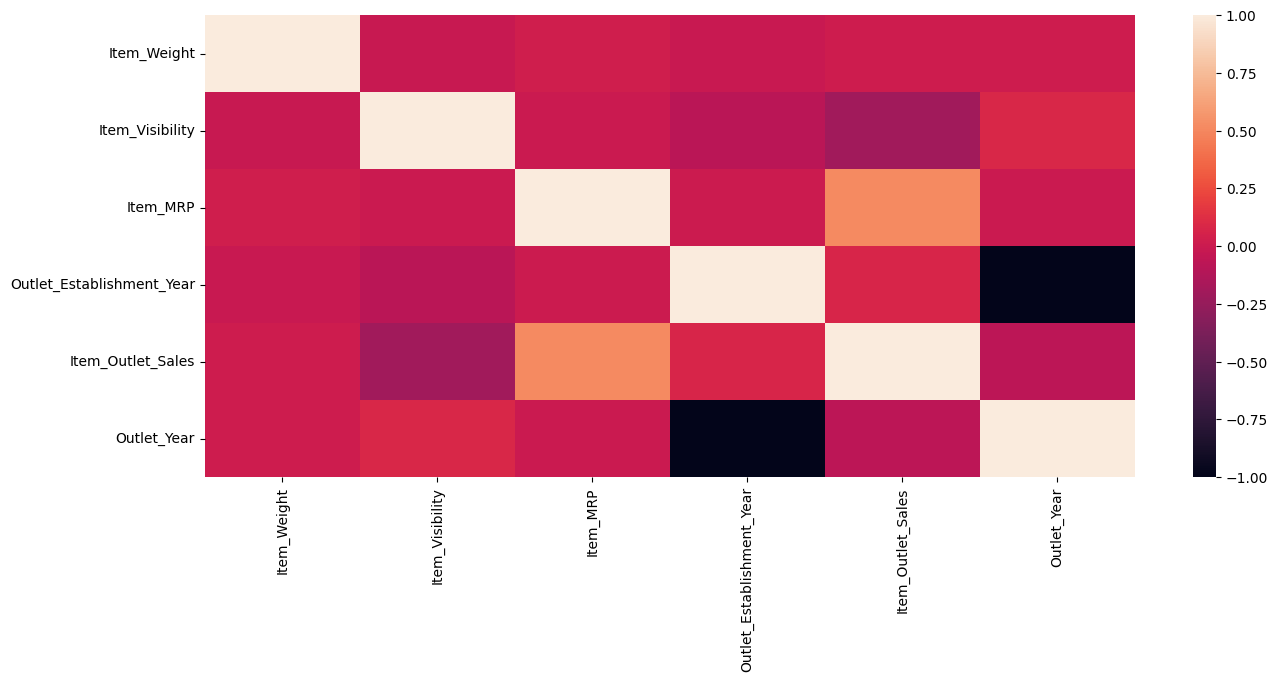

In [60]:
snb.heatmap(corr)

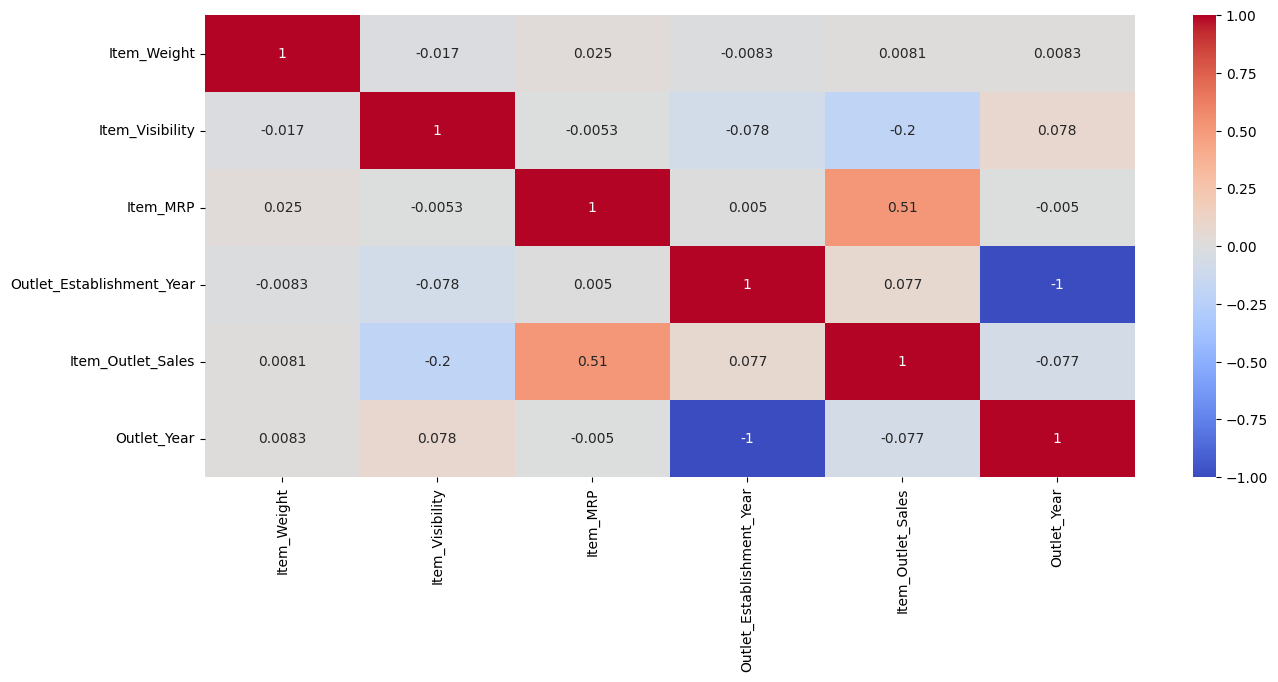

In [61]:
snb.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [62]:
display(dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,24
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,25
4,NCD19,8.93,Non-Eatable,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,36


In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Outlet'] = le.fit_transform(dt['Outlet_Identifier'])
display (dt['Outlet'])

0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32

In [64]:
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']

for col in cat_col:
    dt[col]=le.fit_transform(dt[col])

display(dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Year,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,8.225808,1,24,9
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,6.096776,0,14,3
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,7.648868,1,24,9
3,FDX07,19.20,2,0.066132,6,182.0950,0,1998,2,2,0,6.597664,1,25,0
4,NCD19,8.93,1,0.066132,9,53.8614,1,1987,0,2,1,6.903451,2,36,1


In [65]:
dt = pd.get_dummies(dt,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])
display(dt.head())

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Year,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,9,1999,8.225808,24,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,3,2009,6.096776,14,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,9,1999,7.648868,24,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,0,1998,6.597664,25,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,1,1987,6.903451,36,1,...,0,0,1,0,1,0,0,0,0,1


In [66]:
x=dt.drop(columns=['Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier','Item_Outlet_Sales'])
x.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Year,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,24,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,14,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,24,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.066132,6,182.0950,25,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.066132,9,53.8614,36,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [67]:
y=dt['Item_Outlet_Sales']
y.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print (x.shape, y.shape)
print (x_train.shape, x_test.shape ,  y_train.shape, y_test.shape)


(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)


In [69]:
from sklearn.metrics import SCORERS
SCORERS.keys()

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):
    # training the model
    model.fit(X, y)
    
    y_pred = model.predict(X)
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )    
    cv_score = np.abs(np.mean(cv_score))    
    print ('ABS Average of - neg_mean_squared_error',cv_score )       
    cv_score = cross_val_score(model, X, y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )    
    cv_score = np.mean(cv_score)     
    print ('Average R2 Score ',cv_score)    
    print ()
    print ('Accuracy for full Data')
    print('R2_Score:', r2_score(y,y_pred))
    print ()


Model Report
Scoring - neg_mean_squared_error
[-0.29248493 -0.27377221 -0.28602029 -0.28521306 -0.28145789]
ABS Average of - neg_mean_squared_error 0.2837896769911289

R2 Score 
[0.69558917 0.73188704 0.71678749 0.73397657 0.72791964]
Average R2 Score  0.7212319834879439

Accuracy for full Data
R2_Score: 0.7232318989094537

New_Item_Type_0          -3.079032e+12
New_Item_Type_1          -3.079032e+12
Outlet_Type_0            -1.676749e+12
Outlet_Type_1            -1.676749e+12
Outlet_Type_2            -1.676749e+12
Outlet_Type_3            -1.676749e+12
Outlet_Size_1            -7.773472e+11
Outlet_Size_2            -7.773472e+11
Outlet_Size_0            -7.773472e+11
Outlet_Year              -7.366976e-02
Item_Weight              -1.833598e-03
Item_Visibility          -1.523033e-03
Item_Type                 1.411425e-03
Item_MRP                  8.177527e-03
Outlet                    6.157964e-02
Item_Fat_Content_1        1.716548e+12
New_Item_Type_2           7.846751e+12
Item_Fat_Co

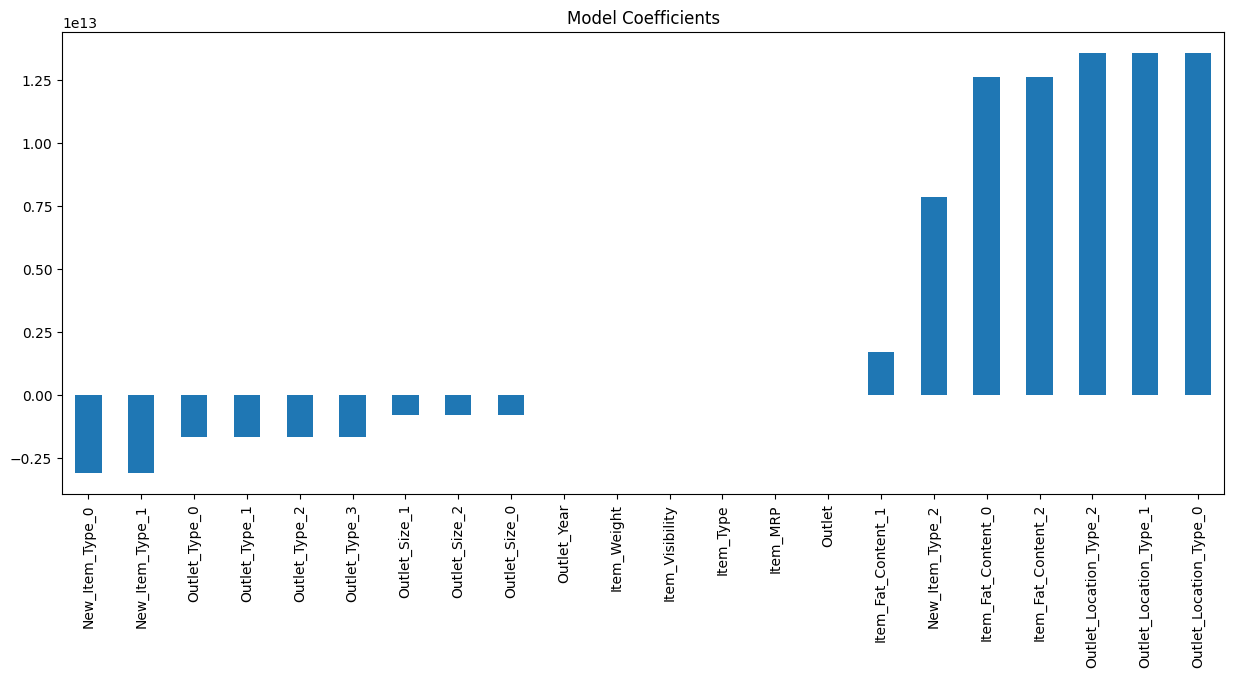

In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, x_train, y_train)
coef = pd.Series(model.coef_, x.columns).sort_values()
print (coef)
coef.plot(kind='bar', title="Model Coefficients")
plt.show()
    

Model Report
Scoring - neg_mean_squared_error
[-0.40191818 -0.41003625 -0.42571055 -0.44960449 -0.41807968]
ABS Average of - neg_mean_squared_error 0.4210698294516164

R2 Score 
[0.58169385 0.59843977 0.57846852 0.58064569 0.59584978]
Average R2 Score  0.5870195230641138

Accuracy for full Data
R2_Score: 0.5885448003115293



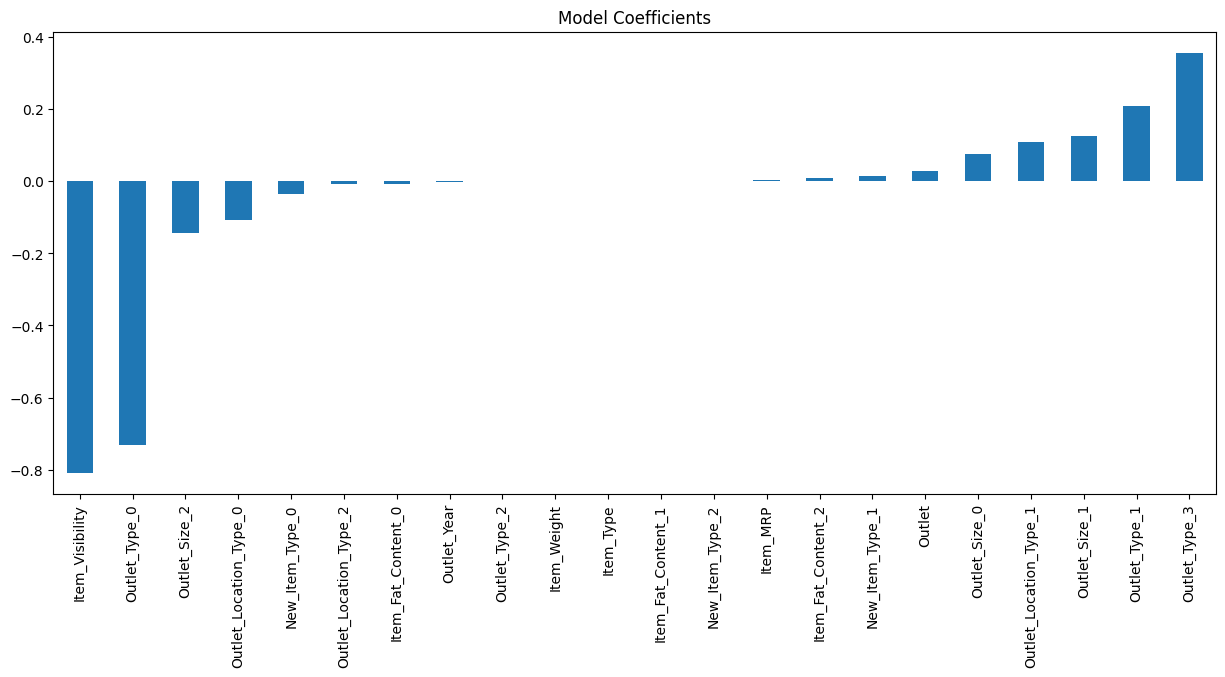

In [71]:
model = Ridge(normalize=True)
train(model,x_train,y_train)
coef=pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title="Model Coefficients")
plt.show()

Model Report
Scoring - neg_mean_squared_error
[-0.72314998 -0.75701947 -0.75847666 -0.74093272 -0.78787083]
ABS Average of - neg_mean_squared_error 0.7534899315973709

R2 Score 
[0.24736402 0.25862917 0.24896908 0.30891853 0.23837923]
Average R2 Score  0.2604520071591053

Accuracy for full Data
R2_Score: 0.26227683517122646



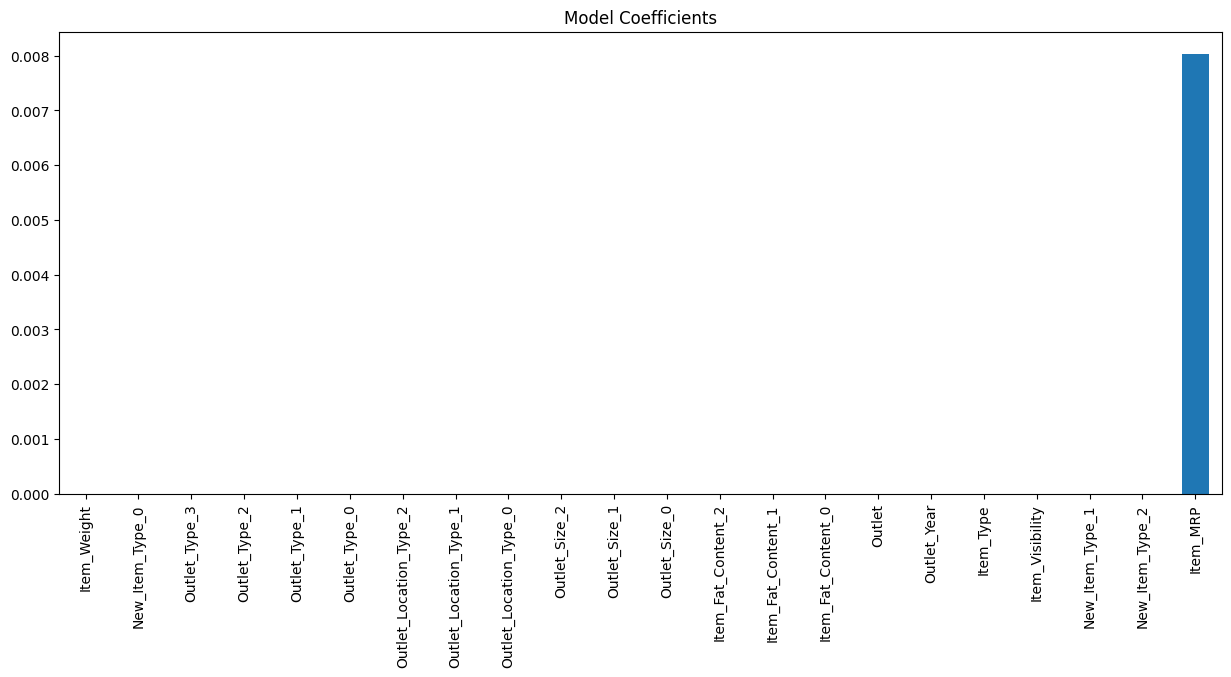

In [72]:
model= Lasso()
train(model,x_train,y_train)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title="Model Coefficients")
plt.show()

Model Report
Scoring - neg_mean_squared_error
[-0.56031761 -0.56281714 -0.52720925 -0.54607942 -0.54236319]
ABS Average of - neg_mean_squared_error 0.5477573235297823

R2 Score 
[0.41767795 0.44024027 0.48511915 0.48441279 0.46782255]
Average R2 Score  0.45905454262574913

Accuracy for full Data
R2_Score: 1.0



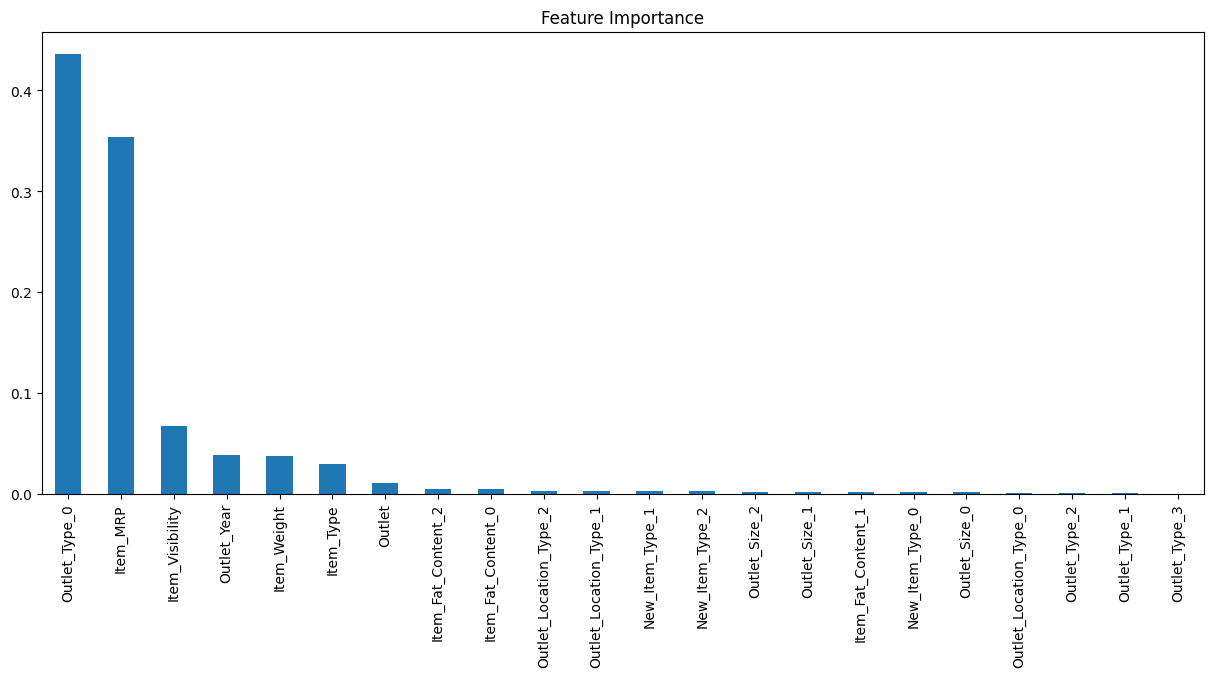

In [73]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,x_train,y_train)
coef=pd.Series(model.feature_importances_,x.columns).sort_values(ascending = False)
coef.plot(kind='bar',title="Feature Importance")
plt.show()

Model Report
Scoring - neg_mean_squared_error
[-0.55964488 -0.57910893 -0.53190657 -0.55736283 -0.56138869]
ABS Average of - neg_mean_squared_error 0.557882378421948

R2 Score 
[0.42399918 0.43158359 0.4728438  0.48048314 0.45948558]
Average R2 Score  0.4536790574226954

Accuracy for full Data
R2_Score: 1.0



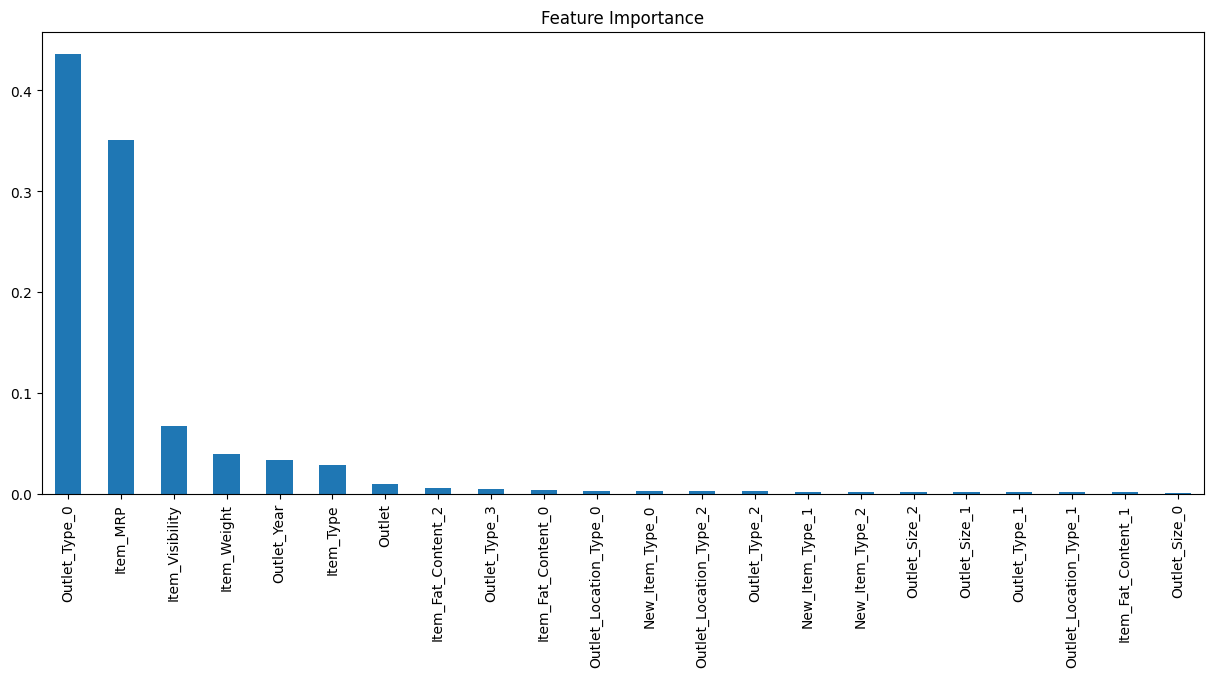

In [74]:
from sklearn.ensemble import RandomForestRegressor
moadel = RandomForestRegressor()
train(model,x_train,y_train)
coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending = False)
coef.plot(kind='bar',title="Feature Importance")
plt.show()

Model Report
Scoring - neg_mean_squared_error
[-0.33265627 -0.32076923 -0.32697839 -0.32161177 -0.32312393]
ABS Average of - neg_mean_squared_error 0.32502791764407296

R2 Score 
[0.65364894 0.68885254 0.67627875 0.69528038 0.68730318]
Average R2 Score  0.6802727589079764

Accuracy for full Data
R2_Score: 1.0



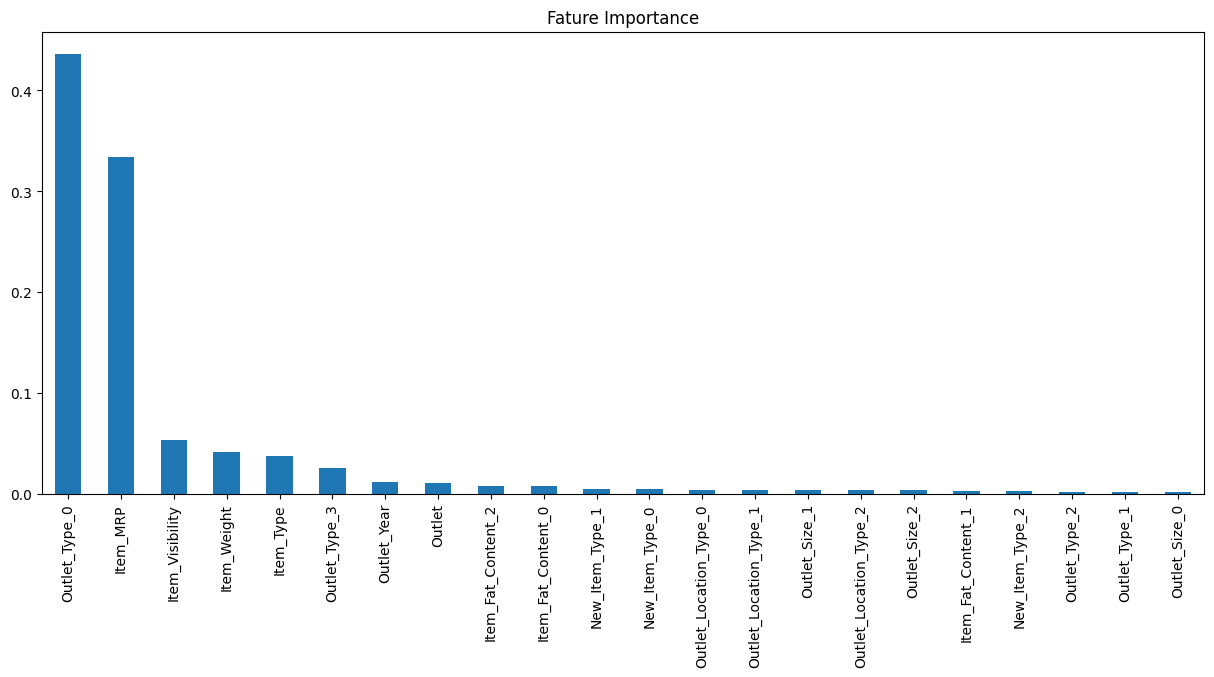

In [75]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model,x_train,y_train)
coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title="Fature Importance")
plt.show()

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 22
[LightGBM] [Info] Start training from score 7.295854
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 22
[LightGBM] [Info] Start training from score 7.292207
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not 

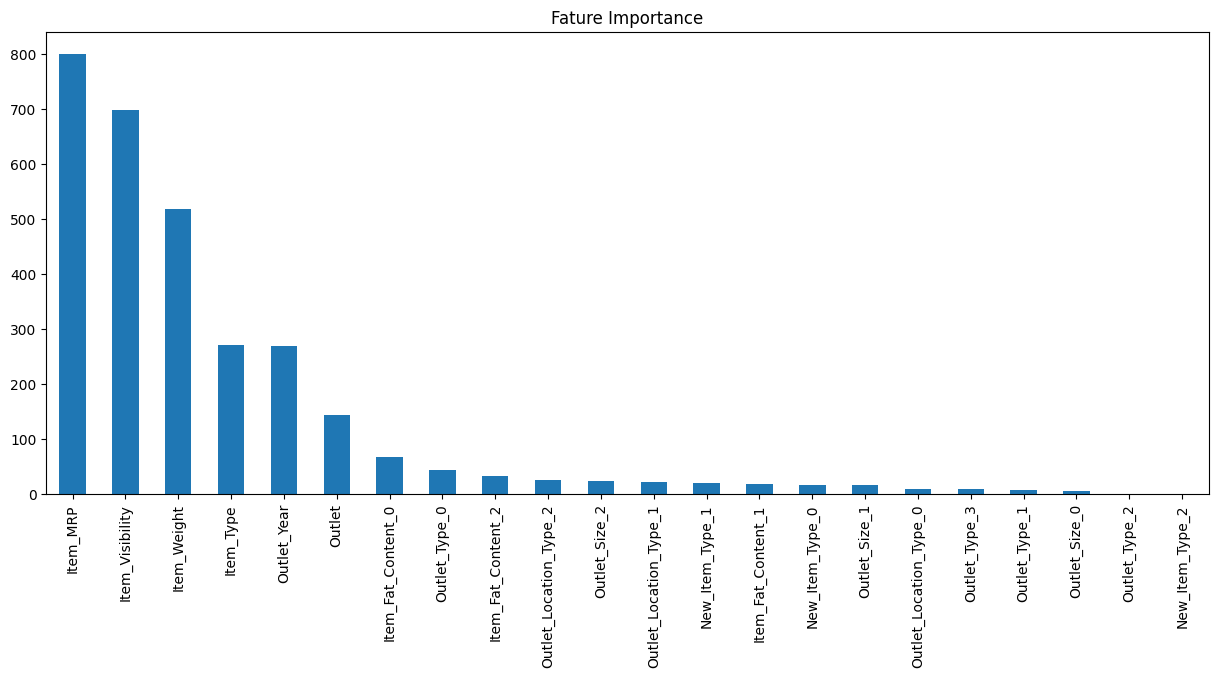

In [76]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model,x_train,y_train)
coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title="Fature Importance")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.31797058 -0.29325138 -0.3141655  -0.29825842 -0.3144247 ]
ABS Average of - neg_mean_squared_error 0.30761411557145063

R2 Score 
[0.66906436 0.71281054 0.68891857 0.72180893 0.69605122]
Average R2 Score  0.6977307221678791

Accuracy for full Data
R2_Score: 0.8984819392949467



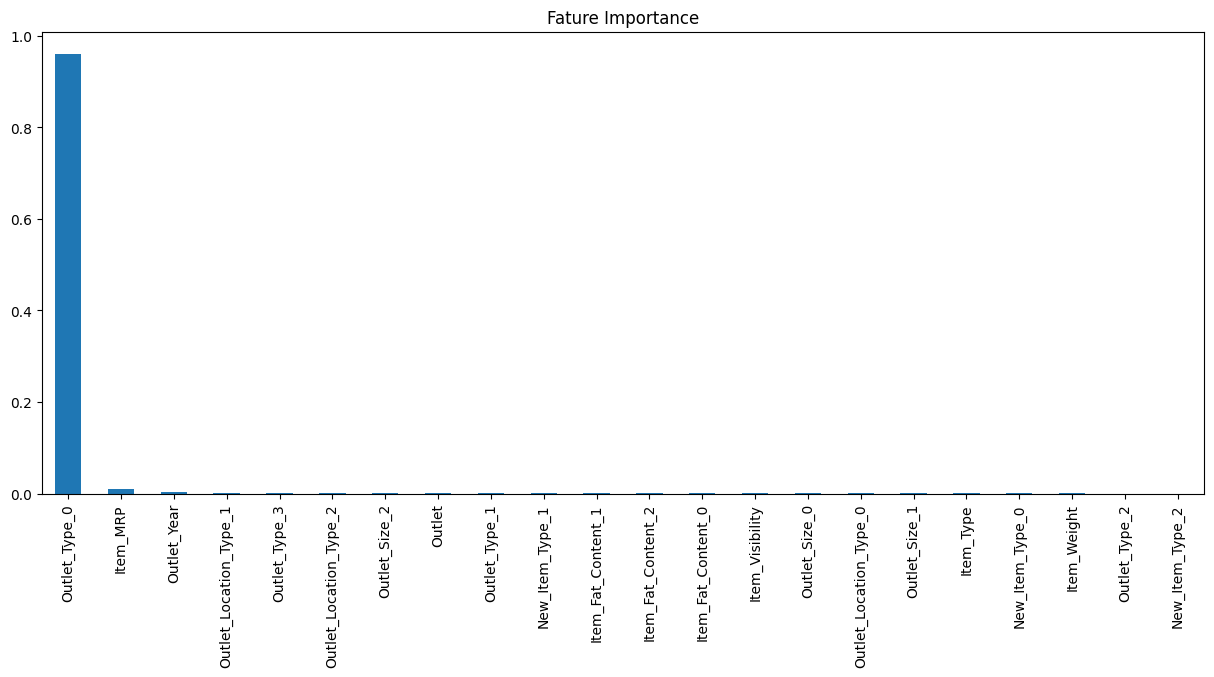

In [77]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model,x_train,y_train)
coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title="Fature Importance")
plt.show()

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
max_features = ['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_sample_split = [2,5,10,15,100]
min_sample_leaf=[1,2,5,10]

In [80]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_sample_split,
               'min_samples_leaf': min_sample_leaf}

print(random_grid)


{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [81]:
       
rf = RandomForestRegressor()
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
display (rf.fit(x_train, y_train))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.6s
[CV] END max_depth=5

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
print(rf.best_params_)
print(rf.best_score_)
predictions=rf.predict(x_test)
display (r2_score (y_test,predictions))
display (predictions)         

{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5}
-0.26854682950287845


0.7255960315272643

array([7.72108553, 7.5265248 , 7.53181841, ..., 7.4774334 , 7.69612263,
       7.86168235])

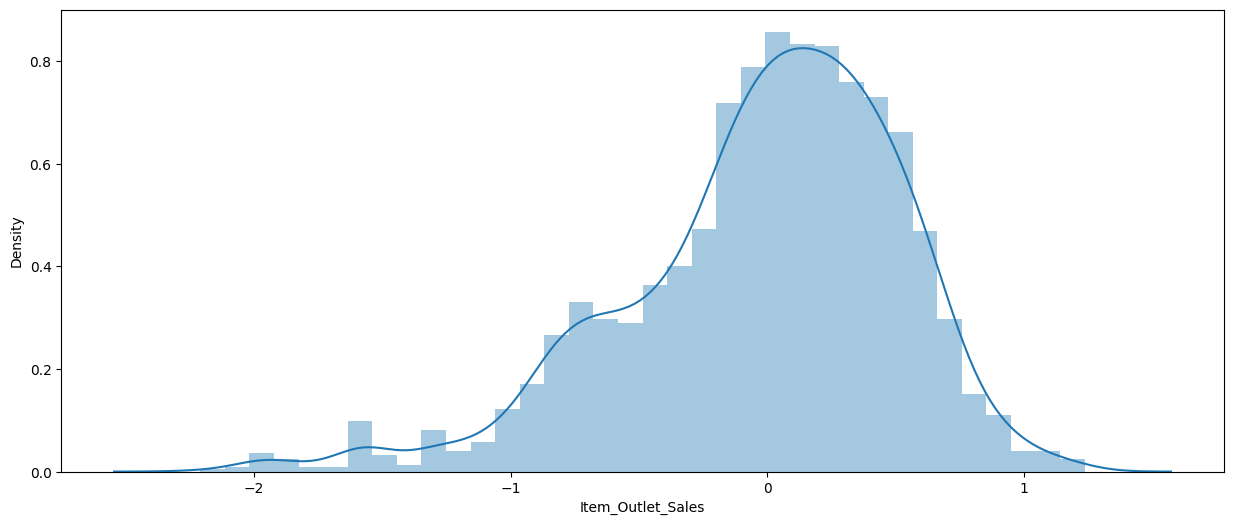

In [83]:
snb.distplot(y_test-predictions)
plt.show()

In [84]:
from scipy.stats import uniform,randint
params={
    "gamma":uniform(0,0.5),
    "learning_rate":uniform(0.03,0.3),
    "max_depth":randint(2,6),
    "n_estimators":randint(100,150),
    "subsample":uniform(0.6,0.4)
}

In [85]:
lgb=LGBMRegressor()
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(x,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 22
[LightGBM] [Info] Start training from score 7.296077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E43DB62200>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E43DBD7940>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E43DBB1240>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E43DB995A0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E43DBB3F40>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
print(lgb.best_params_)
print(lgb.best_score_)
predictions=lgb.predict(x_test)
display (r2_score (y_test,predictions))
display (predictions)    

{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-0.2706799492098526
[LightGBM] [Warning] Unknown parameter: gamma


0.7377914748603385

array([7.76971638, 7.39781933, 7.50890595, ..., 7.38685026, 7.7519031 ,
       7.85282338])

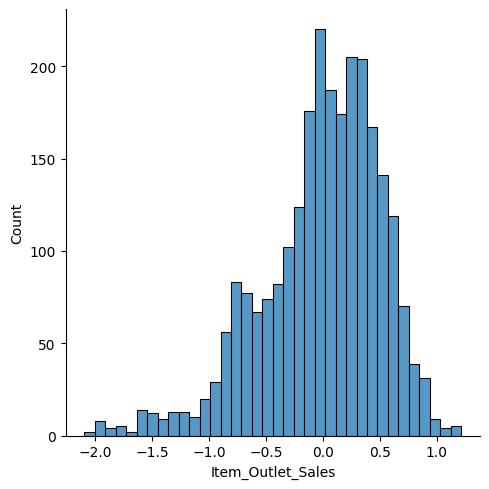

In [87]:
snb.displot(y_test-predictions)
plt.show()

In [88]:
params={
    "gamma":uniform(0,0.5),
    "learning_rate":uniform(0.03,0.3),
    "max_depth":randint(2,6),
    "n_estimators":randint(100,150),
    "subsample":uniform(0.6,0.4)
}

In [89]:
xgb = RandomizedSearchCV(estimator = model,param_distributions=params,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)
xgb.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.6s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.6s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.6s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.6s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.6s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.6s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E4234D2680>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E43DBB34F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E4234D27D0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E43DB62560>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
print(xgb.best_params_)
print(xgb.best_score_)
predictions=xgb.predict(x_test)
display(r2_score(y_test,predictions))
display(predictions)

{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-0.2704215862707118


0.7394955254610043

array([7.739384 , 7.4240503, 7.508462 , ..., 7.374793 , 7.7375946,
       7.8561153], dtype=float32)

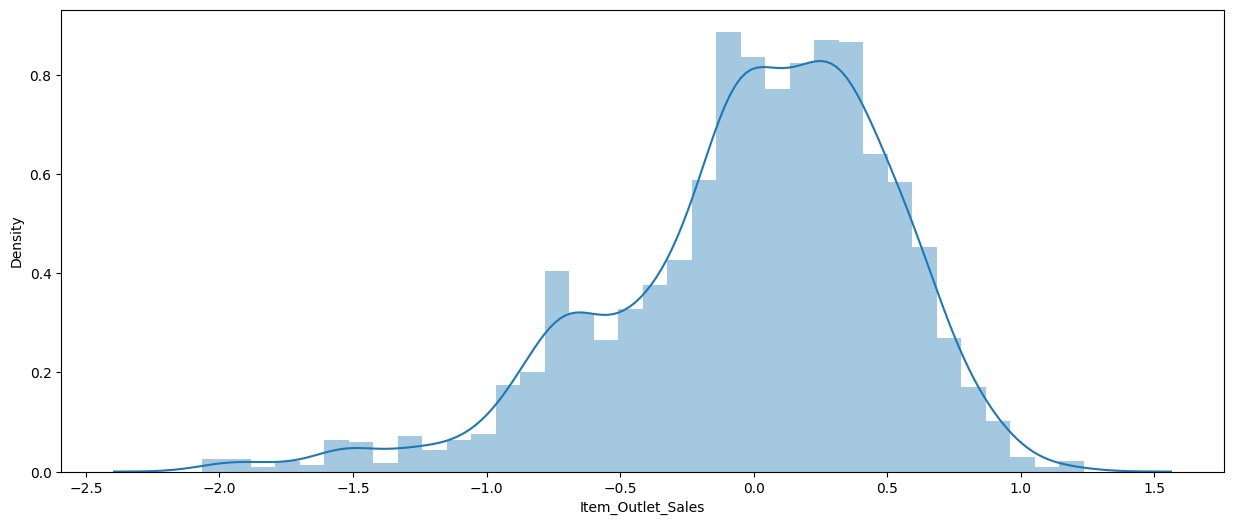

In [91]:
snb.distplot(y_test-predictions)
plt.show()